# ASTR302 Lab 7: Astrometry and Calibrated Photometry

In this Lab you will determine the right ascension and declination of your sources and calibrate the photometry

## Where are we?

You probably pointed the telescope at this field, or at least someone did. So you would think we would know the coordinates. However, in general the telescope pointing is not succiently precise to serve our purposes. We want to do better. 

Before we start, lets import the packages you will be needing for this Lab. You'll be using the astrometry solver which is based on the astronomy.net algorithm. 

In [14]:
#lets install the astrometry package (from astronomy.net)
!pip install --upgrade pip
!pip install astrometry

import matplotlib.pyplot as plt
import csv
import astrometry
import pandas as pd
import astropy.units as u
import numpy as np

import astropy as ap
from astropy.wcs import WCS
from astropy.io import fits

# the 'scales' in the following need to be chosen match to the estimated field-of-view (see https://pypi.org/project/astrometry/)
# these scales are the ones for the image you are working with

solver = astrometry.Solver(
    astrometry.series_5200.index_files(
        cache_directory="astrometry_cache",
        scales={1,3},
    )
)

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


INFO:root:loaded 96 index files


This next cell just reads in your photometry file from before and gets the list of stars that will be used by the astrometry solver.

In [15]:
# read the CSV file and make a list of coordinate pairs for astronometry solver
import re
catalog = pd.read_csv('photometry.csv')

unit = "pix"
x = [sub.replace(unit, "").strip() for sub in catalog['xcenter']]
y = [sub.replace(unit, "").strip() for sub in catalog['ycenter']]

stars = [(x[i],y[i]) for i in range(0,len(x))]
print(stars)

[('89.96238464479197', '36.46699728640751'), ('1063.110773244221', '71.74017482082462'), ('1285.9933358213755', '170.7777908419717'), ('1926.763519080902', '184.5335489289523'), ('2021.0632510209932', '184.6700827130731'), ('626.202663135139', '203.63930495537815'), ('617.5539341412805', '204.91301922851898'), ('1404.23444916969', '235.46515083906695'), ('1382.5725053789945', '254.2184925030471'), ('424.010061046332', '346.64450795421084'), ('1006.4716981476031', '348.6526093328469'), ('1524.1041724196605', '374.9269774743567'), ('1730.69486038104', '398.2160714783153'), ('1869.045795963804', '411.17810596189236'), ('1869.517848194137', '472.763506409768'), ('1635.2225164152717', '504.5086619633342'), ('1643.145260850936', '510.0340507772995'), ('197.91341737414857', '533.1695823922412'), ('708.9585165337196', '616.4814583155763'), ('1684.5240385876625', '619.4498375393956'), ('1550.972771912874', '661.4494402236404'), ('449.6126176955133', '675.4218274325333'), ('323.32842418747134', 

Now on to the actual solver. At the end we print out the header coordinates and the solved coordinates for comparison.

In [8]:
filename = 'imacs_image.fits'
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header

import astrometry
import logging

logging.getLogger().setLevel(logging.INFO)

print(stars)
# start with values close to the what is given in the header
solution = solver.solve(
    stars=stars,
    size_hint=None,
    position_hint=astrometry.PositionHint(
        ra_deg=346.2,
        dec_deg=-8.68,
        radius_deg=1.0),
    solution_parameters=astrometry.SolutionParameters(),
)    

# defines new wcs reference frame using solved for values

if solution.has_match():
    wcs = solution.best_match().astropy_wcs()
    
# it there is a good solution check out correspondence with previous values
    print('The header RA is ',hdr['RA-D'],'and the solved RA is ',solution.best_match().center_ra_deg)
    print('The header Dec is ',hdr['DEC-D'],'and the solved Dec is ',solution.best_match().center_dec_deg)
    print('The header plate scale is ',hdr['SCALE'],'and the solved plate scale is ',solution.best_match().scale_arcsec_per_pixel)

INFO:root:solve 2: start
INFO:root:solve 2: slice=[0, 25[ (1 / 1), index="5200/index-5201-17.fits" (1 / 2)


[('89.96238464479197', '36.46699728640751'), ('1063.110773244221', '71.74017482082462'), ('1285.9933358213755', '170.7777908419717'), ('1926.763519080902', '184.5335489289523'), ('2021.0632510209932', '184.6700827130731'), ('626.202663135139', '203.63930495537815'), ('617.5539341412805', '204.91301922851898'), ('1404.23444916969', '235.46515083906695'), ('1382.5725053789945', '254.2184925030471'), ('424.010061046332', '346.64450795421084'), ('1006.4716981476031', '348.6526093328469'), ('1524.1041724196605', '374.9269774743567'), ('1730.69486038104', '398.2160714783153'), ('1869.045795963804', '411.17810596189236'), ('1869.517848194137', '472.763506409768'), ('1635.2225164152717', '504.5086619633342'), ('1643.145260850936', '510.0340507772995'), ('197.91341737414857', '533.1695823922412'), ('708.9585165337196', '616.4814583155763'), ('1684.5240385876625', '619.4498375393956'), ('1550.972771912874', '661.4494402236404'), ('449.6126176955133', '675.4218274325333'), ('323.32842418747134', 

INFO:root:solve 2: logodds=85.79, matches=10, conflicts=0, distractors=19, ra=346.224, dec=-8.68012, scale=0.110373, index="5200/index-5201-17.fits"
INFO:root:solve 2: slice=[0, 25[ (1 / 1), index="5200/index-5203-17.fits" (2 / 2)


The header RA is  346.2275417 and the solved RA is  346.2236049271391
The header Dec is  -8.7885556 and the solved Dec is  -8.680118064605852
The header plate scale is  0.111 and the solved plate scale is  0.1103727720676129


Now we will display the image, with the new coordinates, and proceed to list the coordinates of your stars. The way we will calibrate the photometry is by comparing the instrumental magnitudes you have measured for your stars with the available Sloan Digital Sky Survey values available through the Legacy Viewer (https://www.legacysurvey.org/viewer/). To keep this relatively simple, we'll do this by hand. Note that the way the image is displayed here is flipped relative to how the Viewer shows the field. You will also need to adjust the vmin and vmax values to get the best image display.

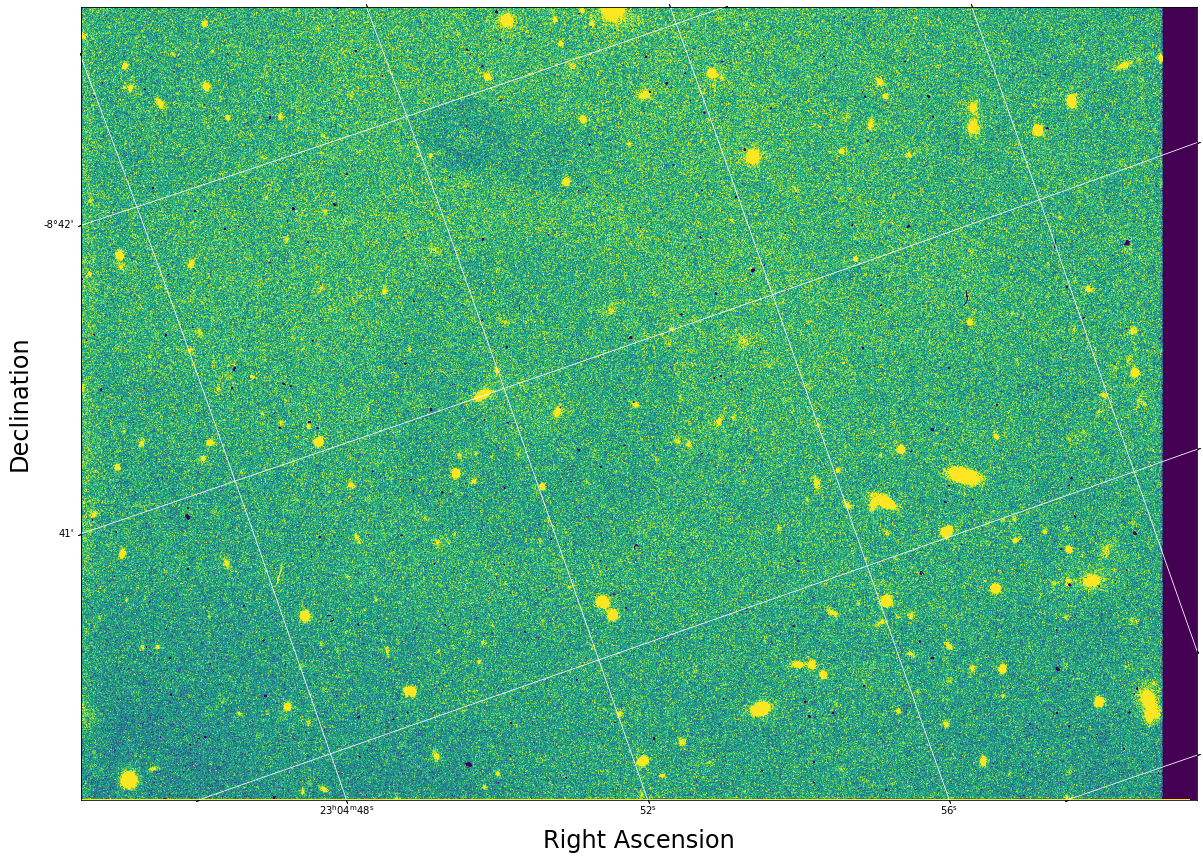

In [4]:
# define the image, open, and read the header information - use your reduced image from the previous workbook

# Create the plotting object with the WCS projection.
plt.figure(figsize = (20,20))
plt.subplot(projection=wcs)
plt.imshow(image, vmin=1140, vmax=1220)
plt.grid(color='white', ls='solid', alpha=1)
plt.xlabel('Right Ascension',fontsize=24)
plt.ylabel('Declination',fontsize=24)

In [13]:
# print out the coordinates of the stars that were used for the coordinate solution
if solution.has_match():
    for star in solution.best_match().stars:
        print(f"{star.ra_deg}, {star.dec_deg}:")
        
if solution.has_match():
    wcs = solution.best_match().astropy_wcs()
    pixels = wcs.all_world2pix(
        [[star.ra_deg, star.dec_deg] for star in solution.best_match().stars],
        0,
    )
# pixels is a len(solution.best_match().stars) x 2 numpy array of float values    
print(pixels)

Star(ra_deg=346.20532448308535, dec_deg=-8.683843772781202, metadata={})
346.2336726615787, -8.66433147357102:
346.18823480952403, -8.66905617739931:
346.243513265095, -8.65474112509978:
346.23425808030146, -8.69655549376907:
346.2123013150077, -8.679577461529542:
346.20119195980266, -8.674652824543134:
346.23997872258013, -8.662921007300673:
346.2382475076029, -8.666945959064282:
346.2056692768748, -8.668461831367345:
346.22407622412464, -8.693401828060251:
346.21709250099656, -8.660225315520053:
346.22830047538, -8.662268106409043:
346.20532448308535, -8.683843772781202:
[[1523.05537485  373.82629339]
 [  89.03242189   35.45826181]
 [1925.74762374  183.41890455]
 [1193.05000013 1372.09667776]
 [ 708.1356747   615.6643115 ]
 [ 422.48773325  345.96301015]
 [1729.86939443  397.71760798]
 [1634.05196484  503.18324258]
 [ 625.48475382  202.26426405]
 [ 917.12690857 1166.86535024]
 [1061.99363847   70.93470631]
 [1381.67939362  253.10357082]
 [ 448.83293073  674.19479294]]


You have a choice here. You can just use the Legacy Viewer and the coordinates of these stars to get the SDSS magnitudes (use r band, but also keep the g band as we will want to look at the dependence of the calibration vs. color) to build up your photometric calibration or you can use astroquery (https://iopscience.iop.org/article/10.3847/1538-3881/aafc33) to get the magnitudes from the SIMBAD database. The latter will likely require much more effort, but will be more general if you want to make it so.

<div class="alert alert-info"> Make a plot of instrumental magnitude vs. SDSS magnitude for these stars. Perform a linear fit to get the zero point (the offset) and check for linearity. </div>

Answer: 

<div class="alert alert-info"> Now plot the offset from the fit for each star vs. color. Do you see a trend or just scatter. If there is a trend, describe the possible origin and how to address it in the calibration.</div>

## Conclusion: 

 <div class="alert alert-info">Save your notebook.  Append your LastNameFirstInitial to the filename and submit via D2L </div>